In [1]:
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 6,5

# 1 - Simple function
Return a 5x5 identity matrix

In [3]:
i = np.identity(5)
i

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2 - Linear regression with one variable

## 2.1 - Plotting data
Read data from a CSV and plot a scatterplot

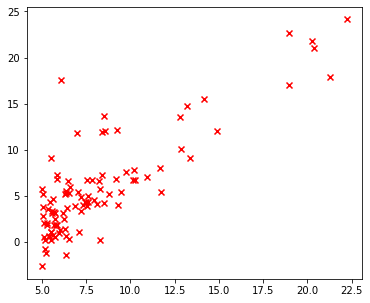

In [4]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

plt.scatter(x, y, marker='x', color='red')

## 2.2 - Gradient Descent

### 2.2.3 - Computing the cost J(theta)

In [5]:
def compute_cost(X, y, theta):
    # Computes the cost of using theta as the parameter for 
    # linear regression to fit the data points in X and y
    m, n = X.shape
    h = X @ theta
    return 1 / (2 * m) * np.sum((h - y) ** 2)

Setup variables for calculations

In [6]:
# Number of training examples
m = x.size

# Reshape x, y values to m by 1 matrices
x = np.reshape(x, (m, 1))
y = np.reshape(y, (m, 1))

# Add a column of ones to x
X = np.hstack((np.ones((m, 1)), x))

Test with theta = [0; 0]

In [7]:
theta = np.zeros((2,1)) 
J = compute_cost(X, y, theta)

print('With theta = [0; 0]')
print('Cost computed = %f' % J)
print('Expected cost value (approx) 32.07')

With theta = [0; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07


Test with theta = [-1; 2]

In [8]:
J = compute_cost(X, y, np.array([[-1], [2]]))

print('With theta = [-1; 2]')
print('Cost computed = %f' % J)
print('Expected cost value (approx) 54.24')

With theta = [-1; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


### 2.2.4 - Gradient Descent

Implement gradient descent algorithm

In [9]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # Updates theta by taking num_iters gradient steps with learning rate alpha

    # Initialize values useful for calculations
    m, num_features = X.shape
    J_history = np.zeros((num_iters, 1))

    for iter in range(num_iters):
        h = X @ theta
        tmp = np.zeros((num_features, 1))
    
        for j in range(num_features):
            col = X[:, j].reshape((m,1))
            tmp[j] = theta[j] - (alpha / m) * np.sum((np.subtract(h, y)) * col)

        theta = tmp.copy()                              # Update all theta values
        J_history[iter] = compute_cost(X, y, theta)     # Store history of cost(J) through iterations
    
    return theta, J_history

Test algorithm with theta = [0; 0]

In [10]:
# Define gradient descent settings
iterations = 1500
alpha = 0.01

theta = np.zeros((2,1))

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)
print('Expected theta values (approx)')
print('  -3.6303\n  1.1664')

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
  -3.6303
  1.1664


Plot the linear fit

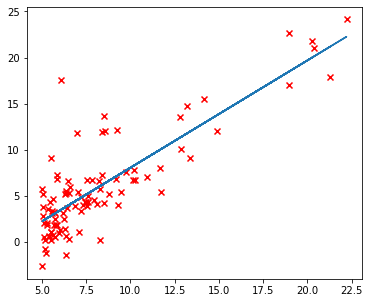

In [22]:
plt.scatter(x, y, marker='x', color='red')
plt.plot(x, X @ theta)

Predict values for population sizes of 35,000 and 70,000

In [19]:
prediction1 = (np.array([1, 3.5]) @ theta) * 10000
print('For population of 35,000, we predict a profit of %f' % prediction1)

prediction2 = (np.array([1, 7]) @ theta) * 10000
print('For population of 70,000, we predict a profit of %f' % prediction2)

For population of 35,000, we predict a profit of 4519.767868
For population of 70,000, we predict a profit of 45342.450129
